# Задание 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import datasets

data = datasets.make_classification(n_samples=228, n_features=2, n_informative=2, n_classes=4, n_redundant=0,
    n_clusters_per_class=1, random_state=777)
sample, cluster = data


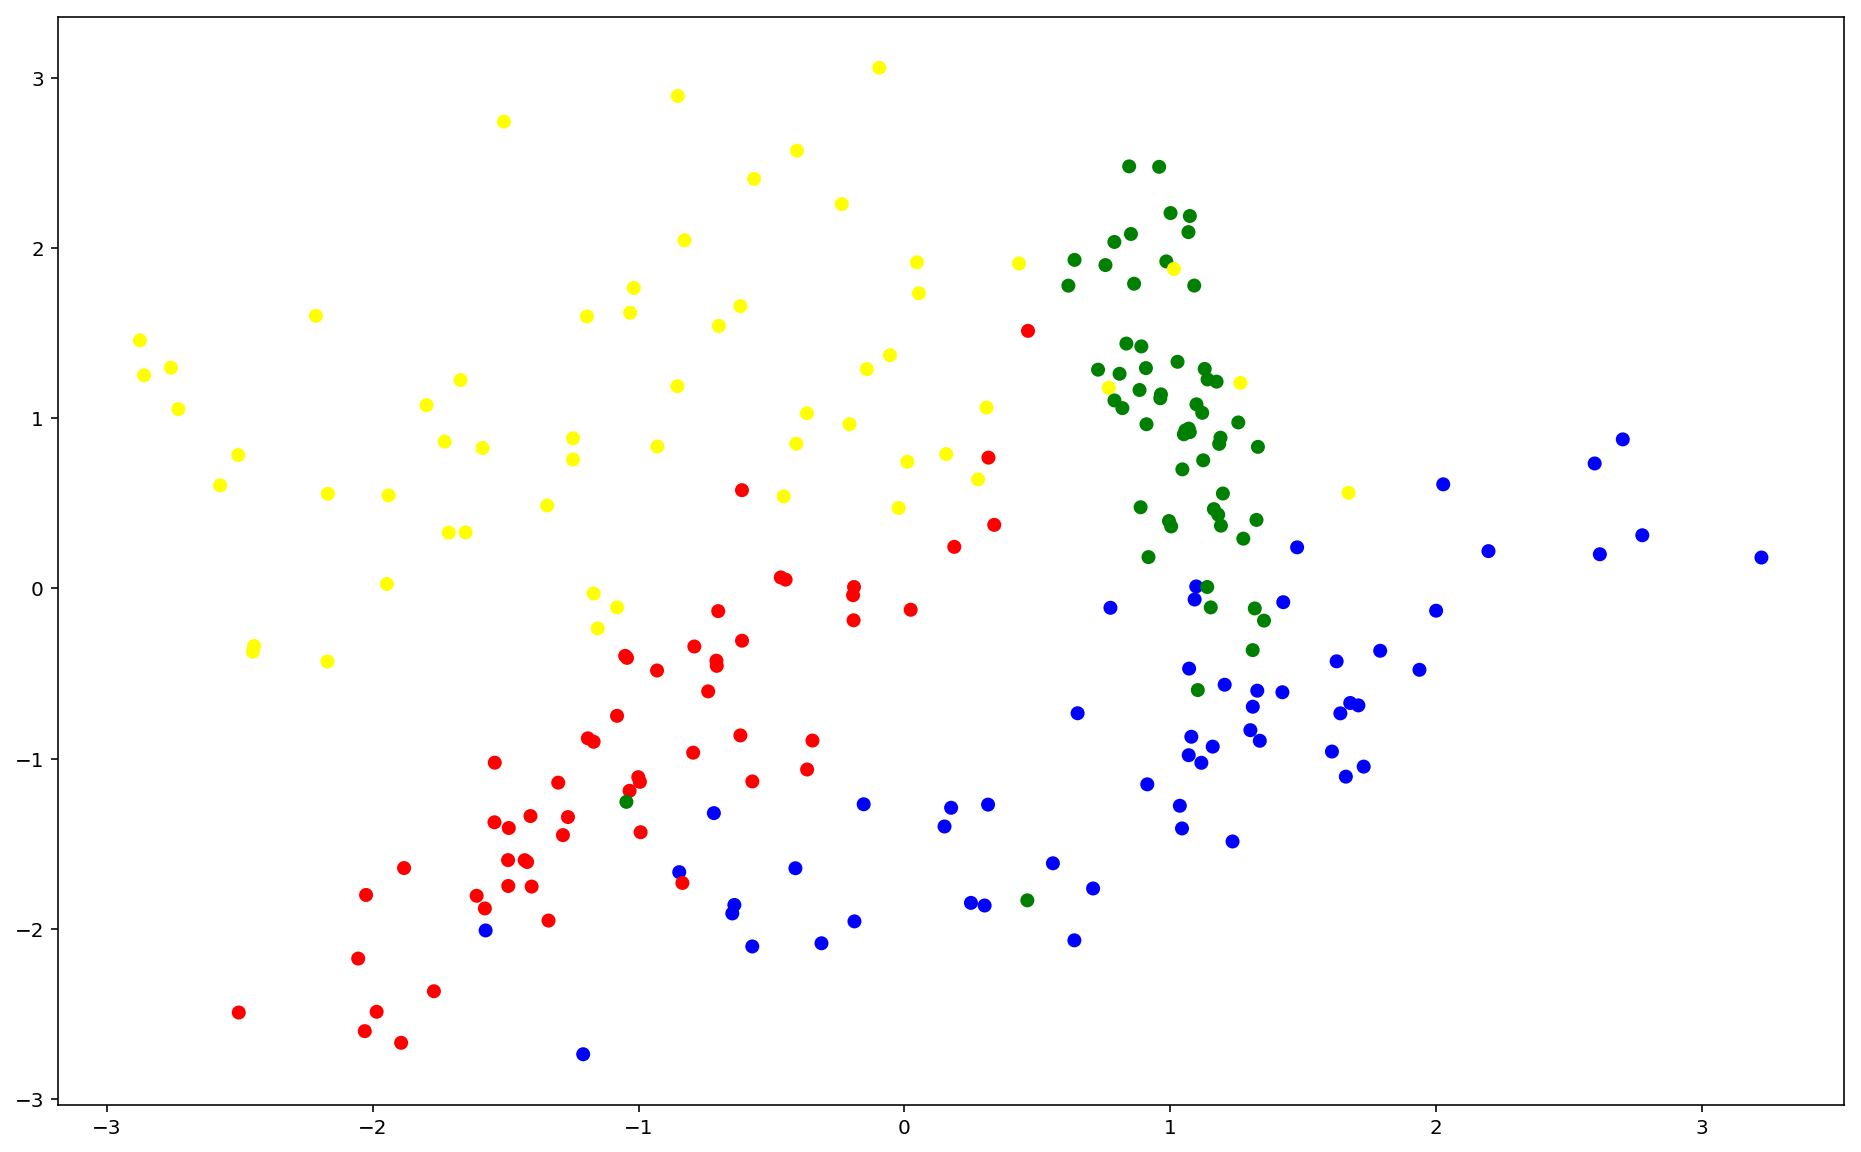

In [3]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

plt.figure(figsize=(16, 10))
plt.scatter(sample[:, 0], sample[:, 1], c=cluster, cmap=colors);

In [11]:
from sklearn import cross_validation, metrics

def get_meshgrid(sample, step=.05, border=1):
    x_min, x_max = sample[:, 0].min() - border, sample[:, 0].max() + border
    y_min, y_max = sample[:, 1].min() - border, sample[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(clf, data):
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data[0], data[1], 
        test_size = 0.3, random_state=1488)
    clf.fit(train_data, train_labels)
    
    #set figure size
    fig = plt.figure(figsize=(16, 6))
    plt.suptitle(f'$k={clf.n_neighbors}$', fontsize=16)
    
    #plot decision surface on the train data 
    plt.subplot(1, 2, 1)
    x, y = get_meshgrid(train_data)
    mesh_predictions = np.array(clf.predict(np.c_[x.ravel(), y.ravel()])).reshape(x.shape)
    plt.pcolormesh(x, y, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title(f'Train data, $accuracy={metrics.accuracy_score(train_labels, clf.predict(train_data)):.2f}$')
    
    #plot decision surface on the test data
    plt.subplot(1, 2 ,2)
    plt.pcolormesh(x, y, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    plt.title(f'Test data, $accuracy={metrics.accuracy_score(test_labels, clf.predict(test_data)):.2f}$')


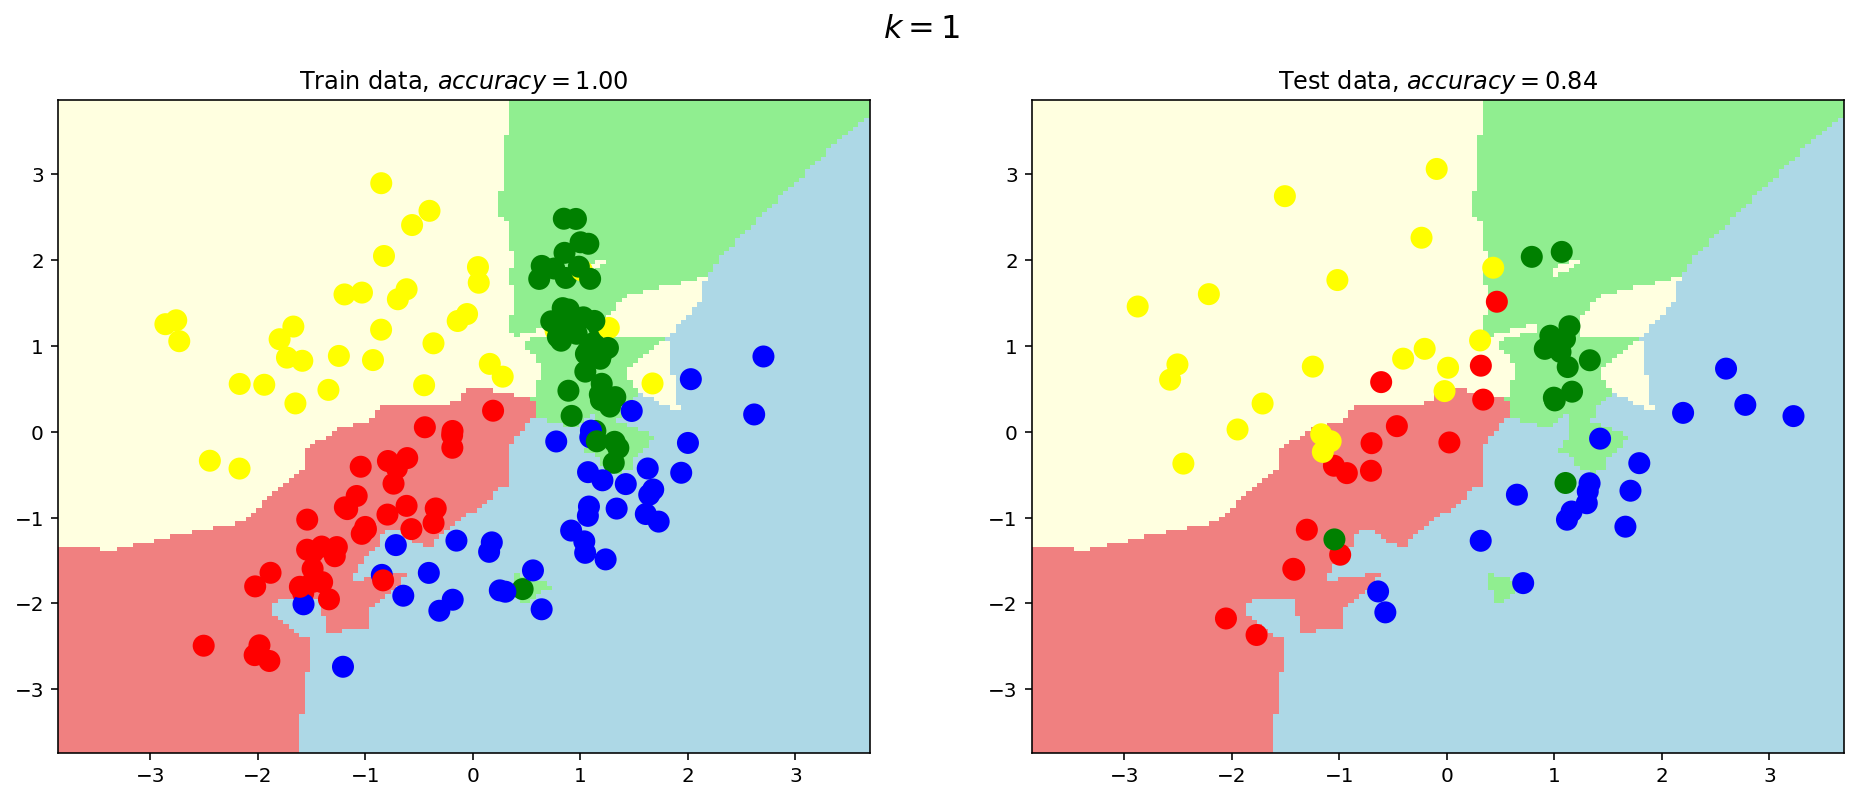

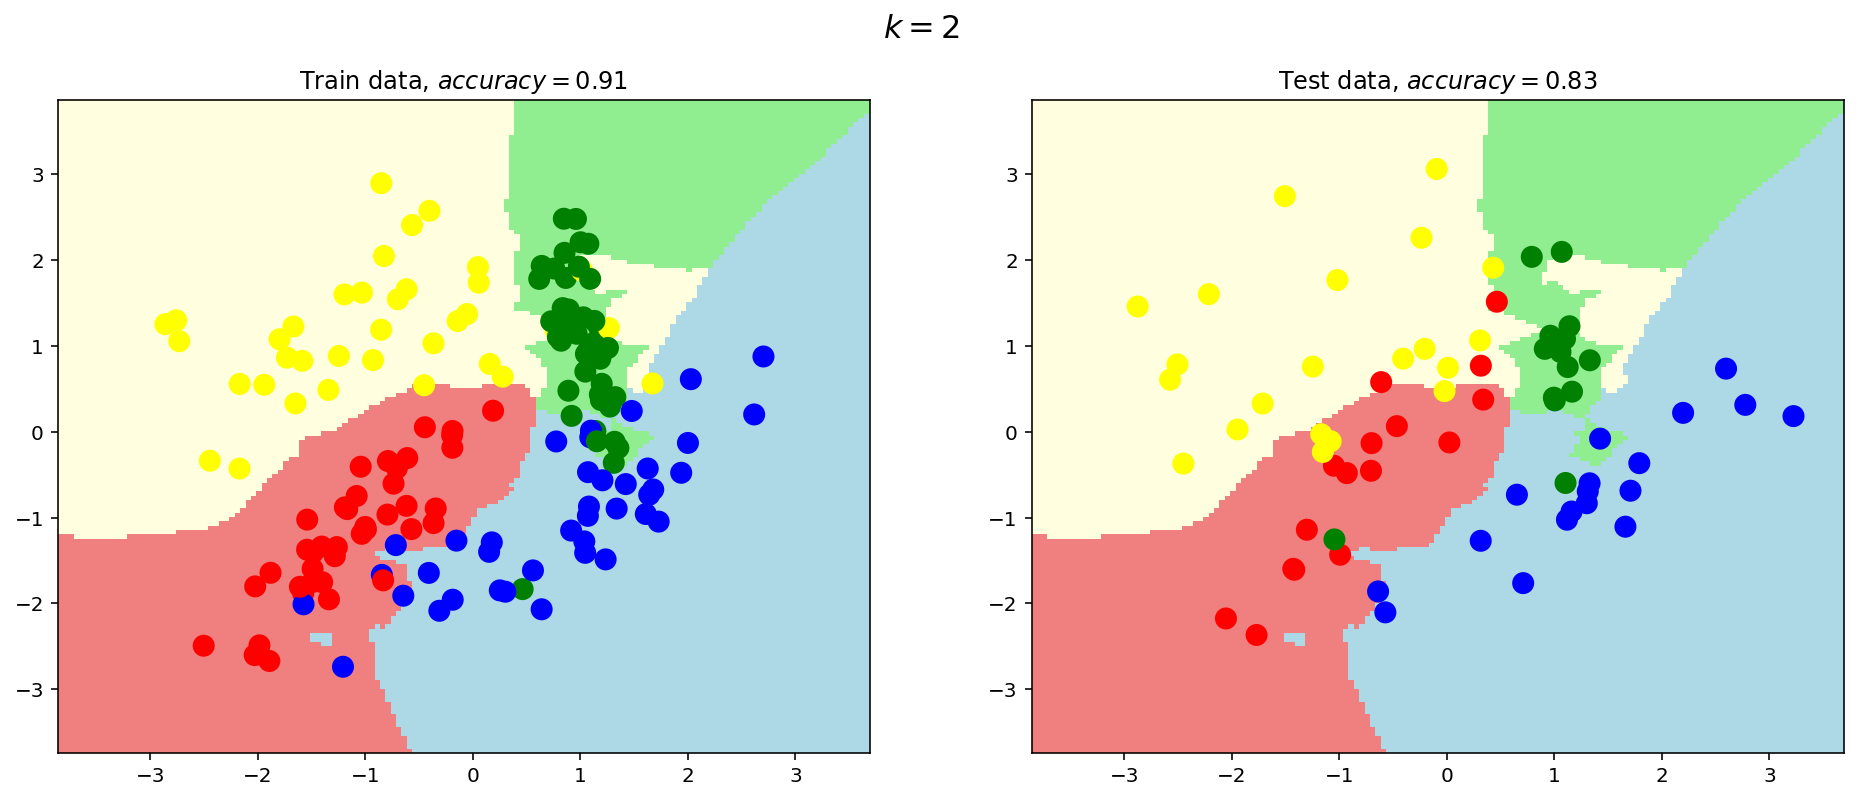

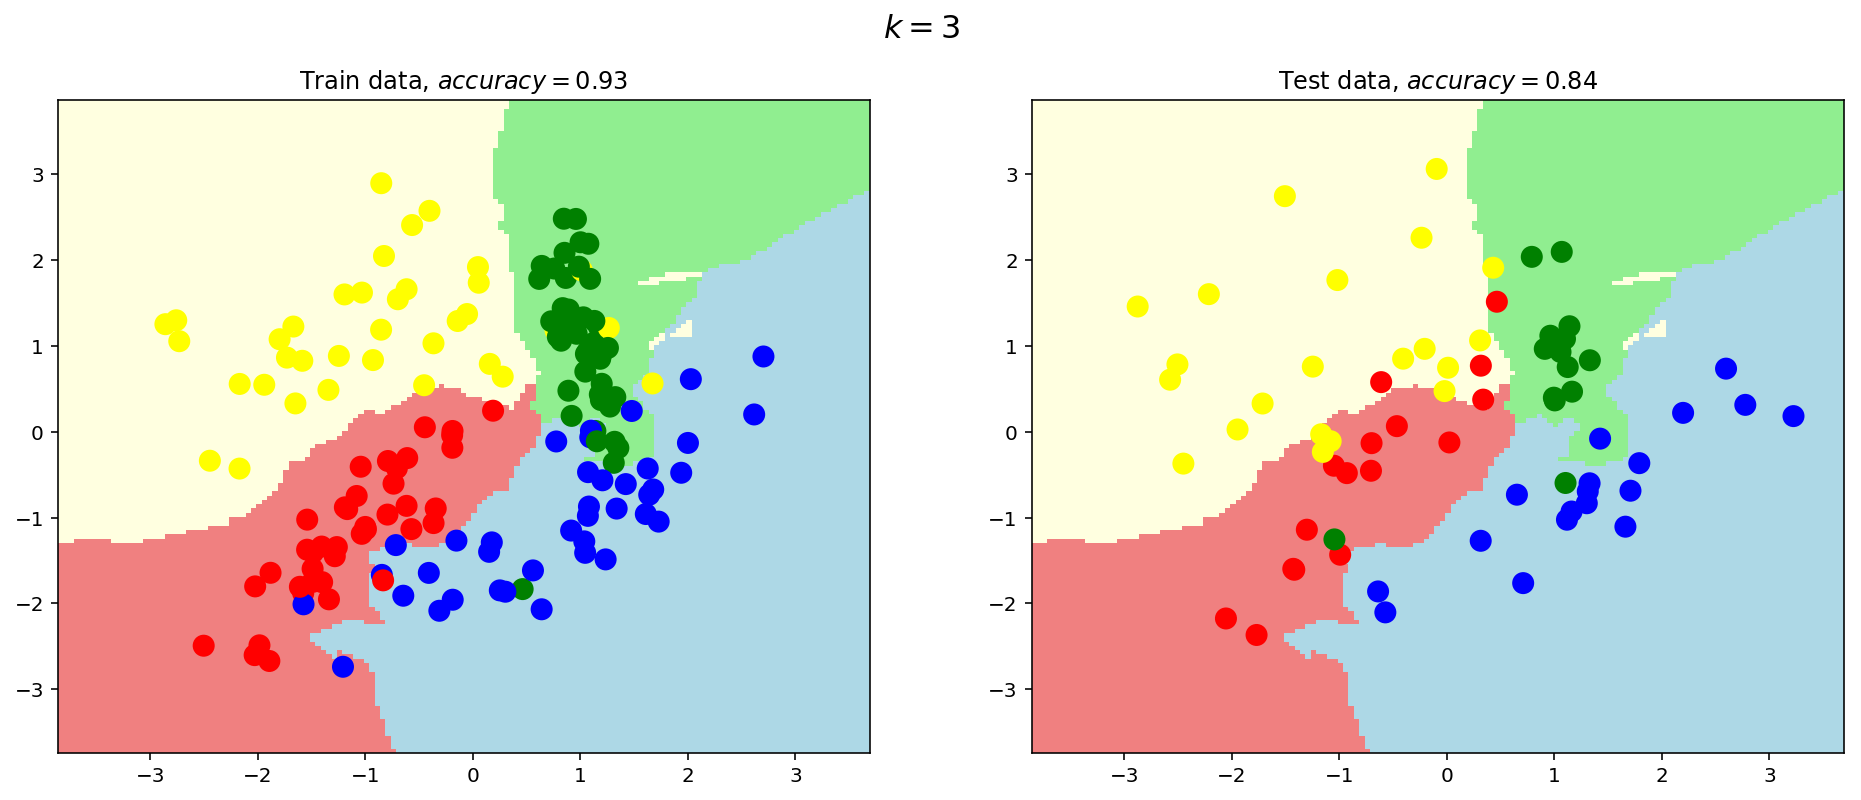

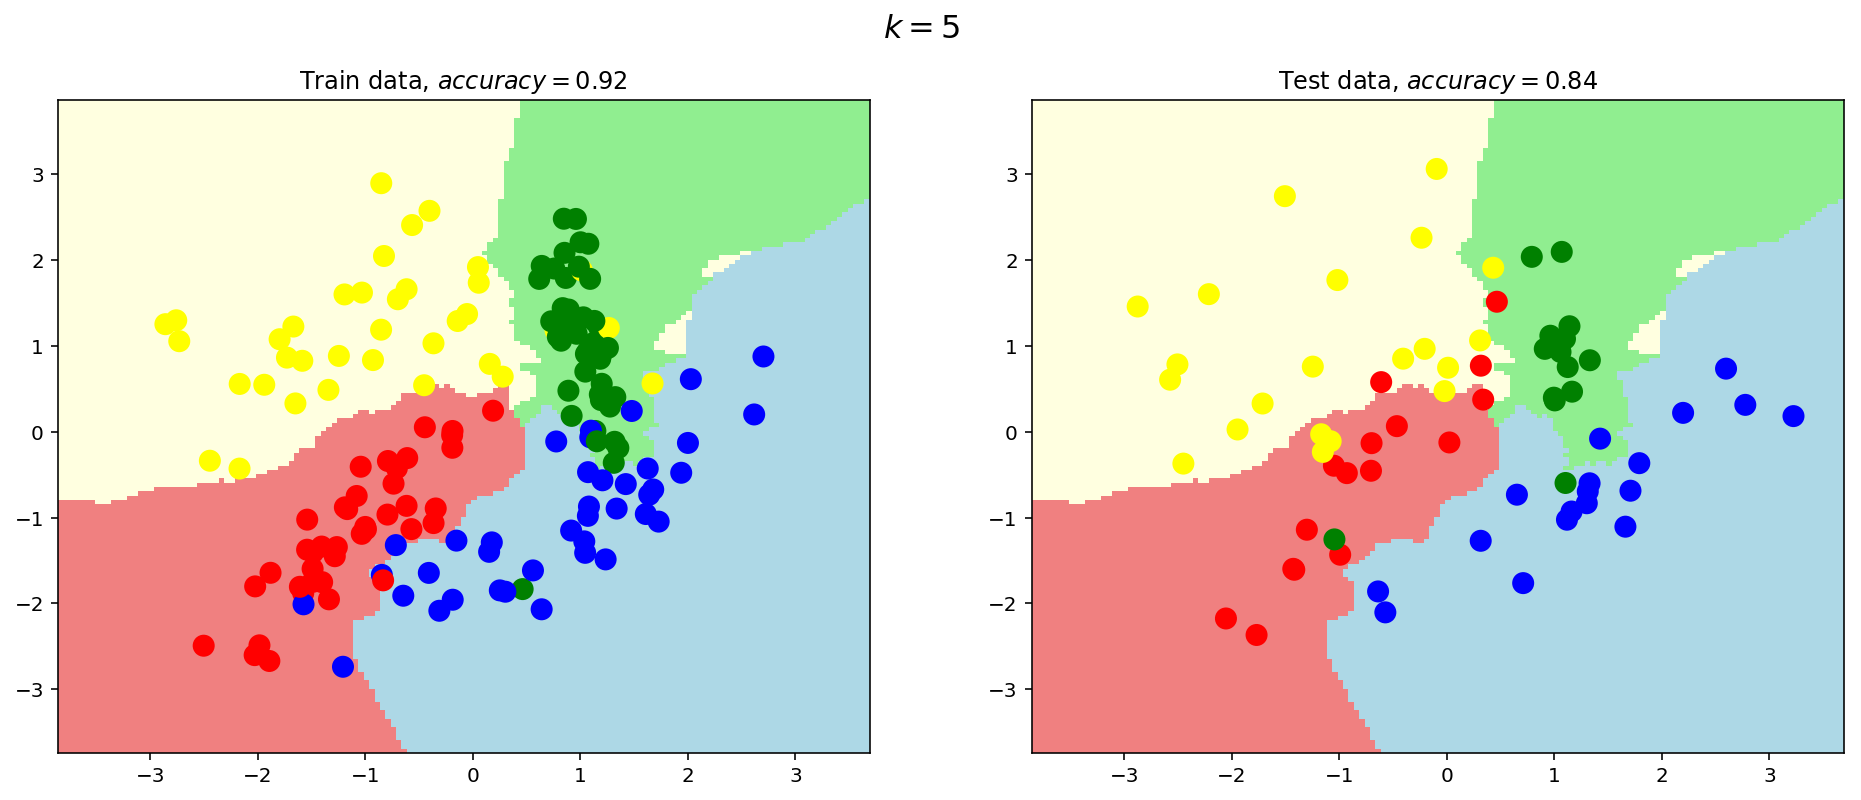

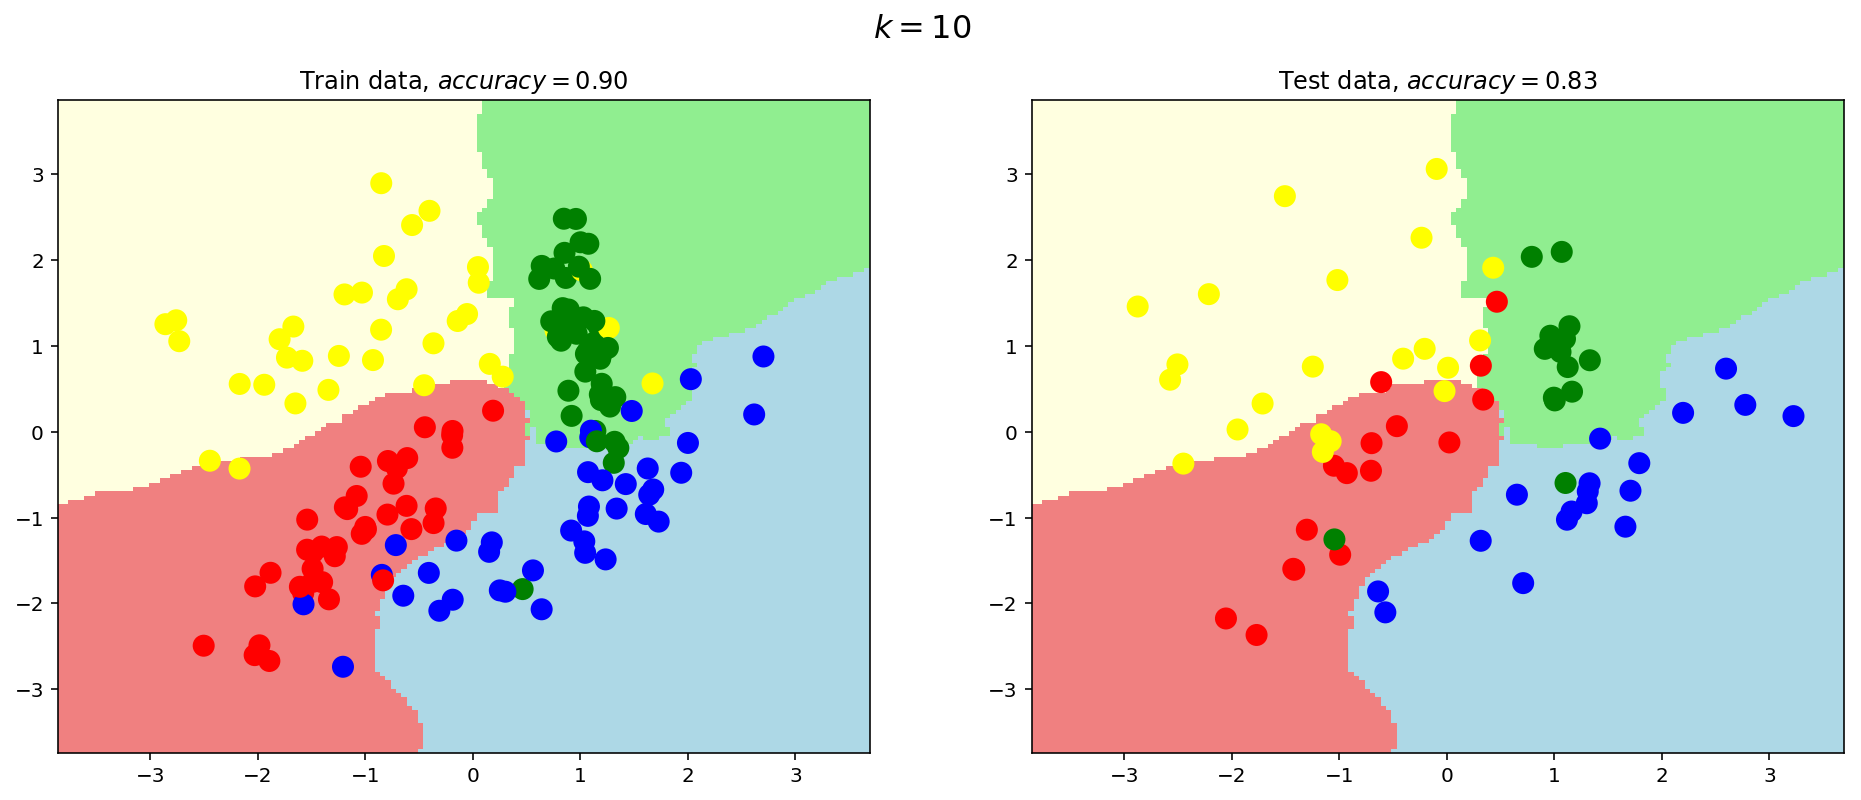

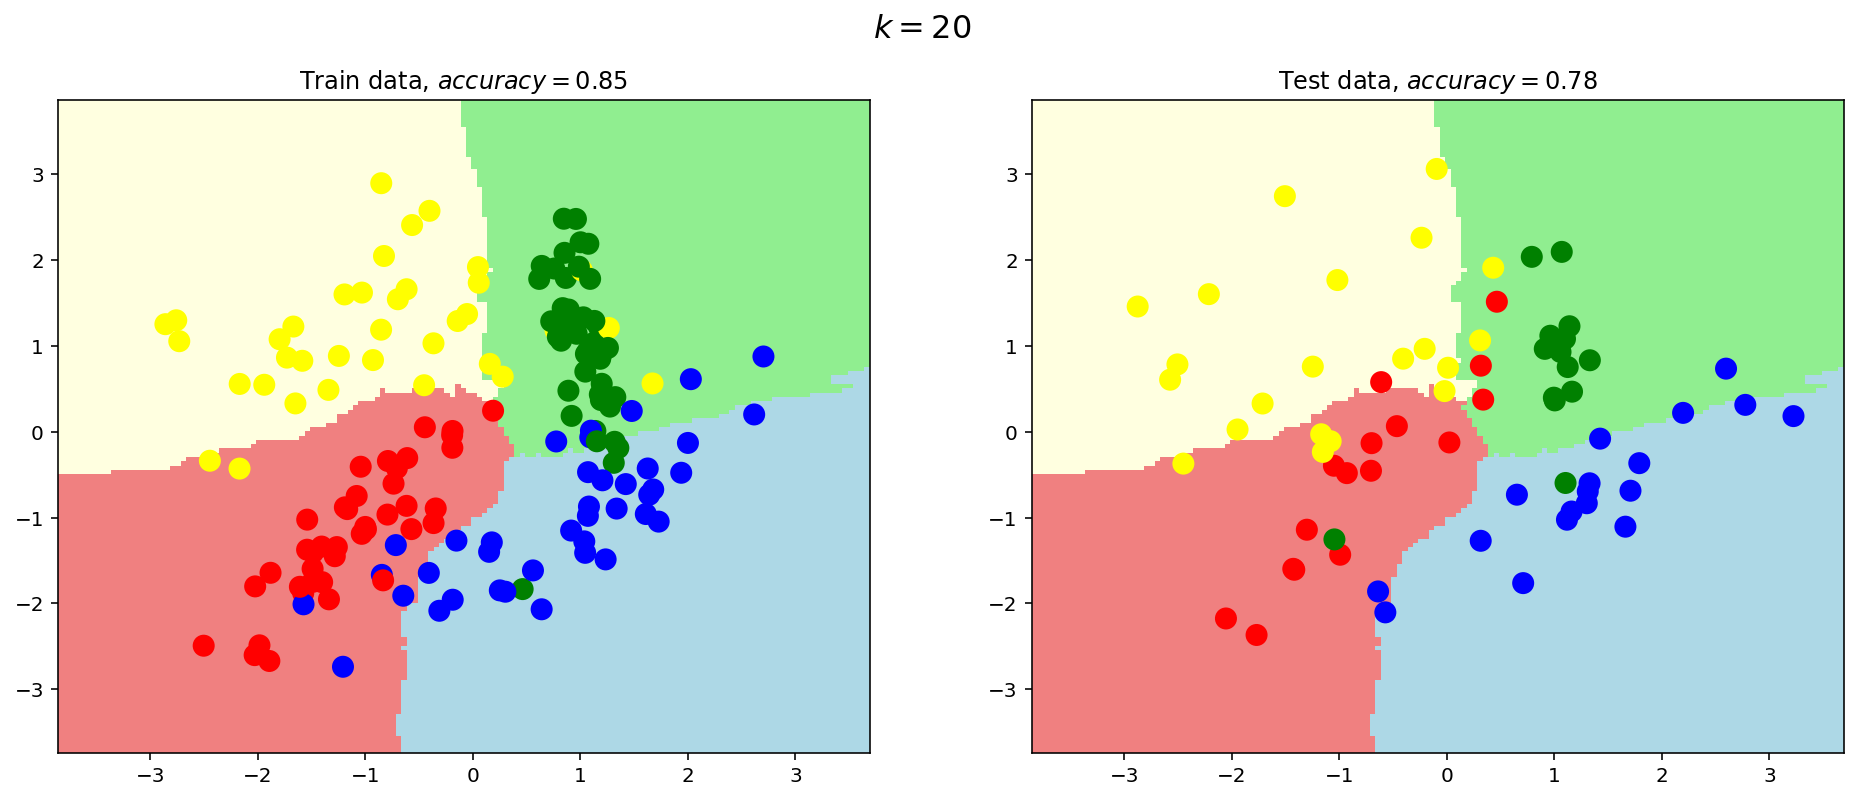

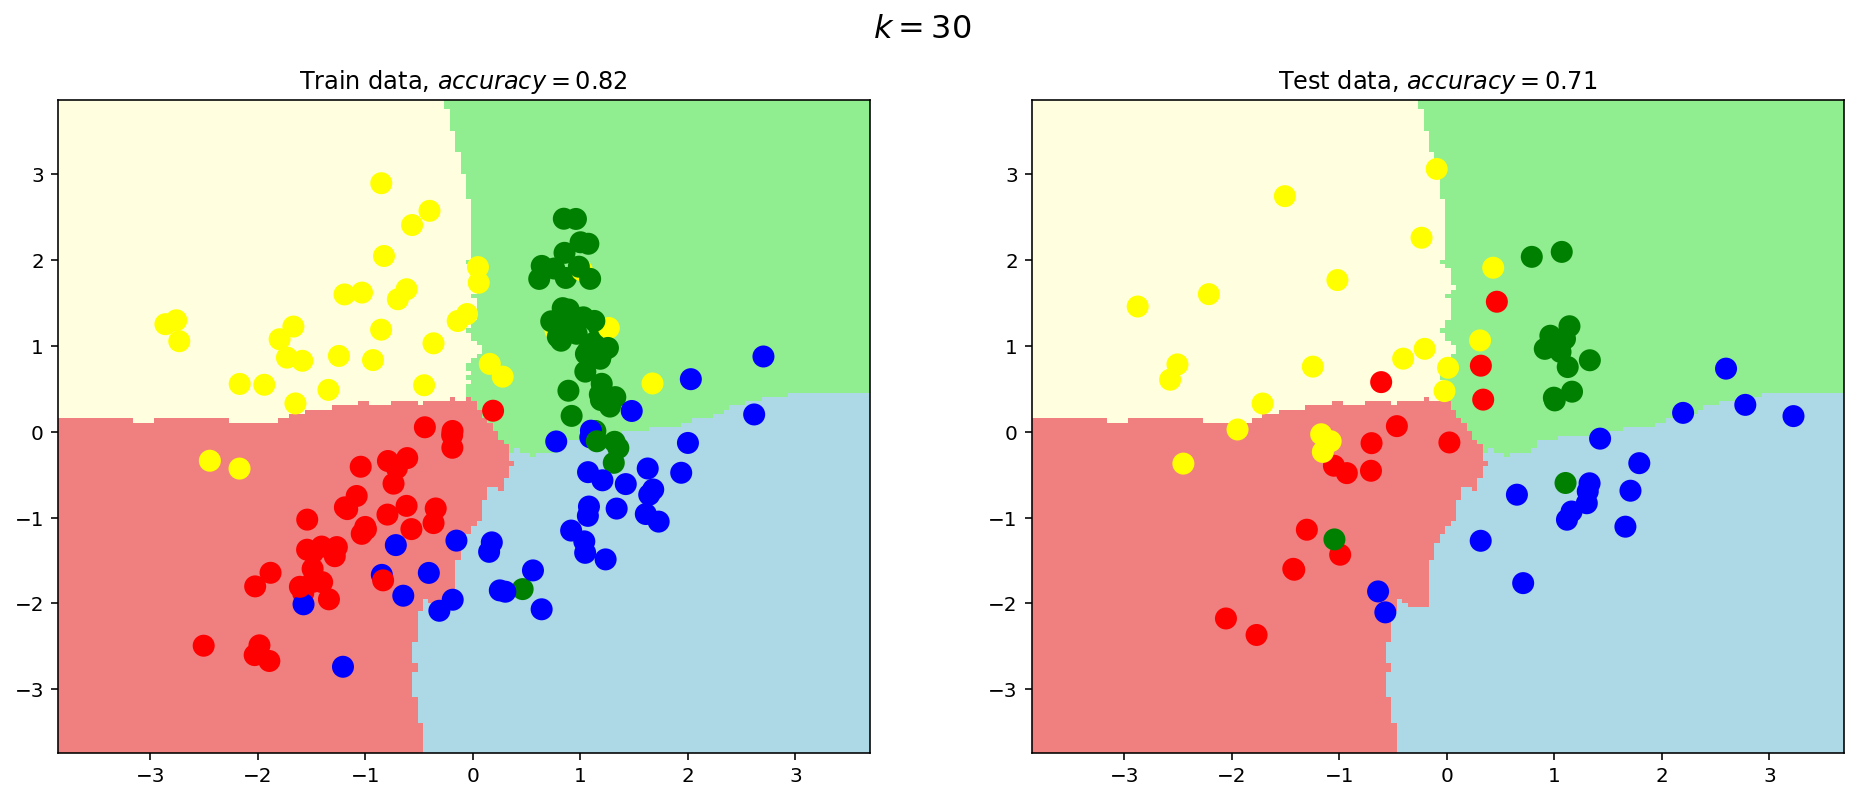

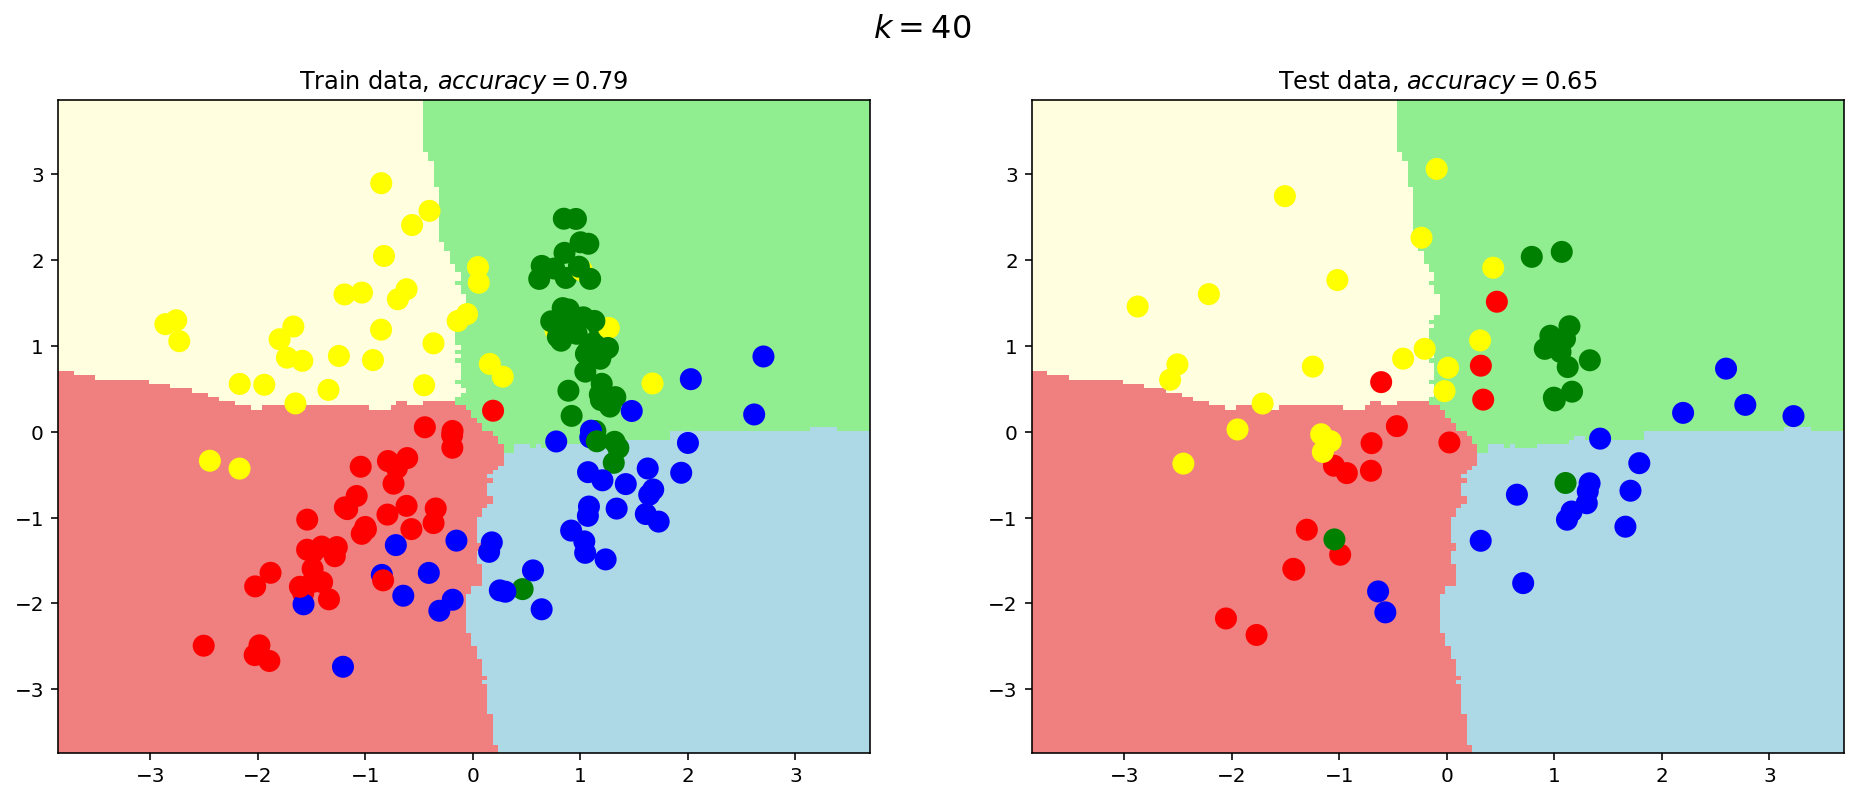

In [5]:
from sklearn import neighbors

for k in [1, 2, 3, 5, 10, 20, 30, 40]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    plot_decision_surface(clf, data)

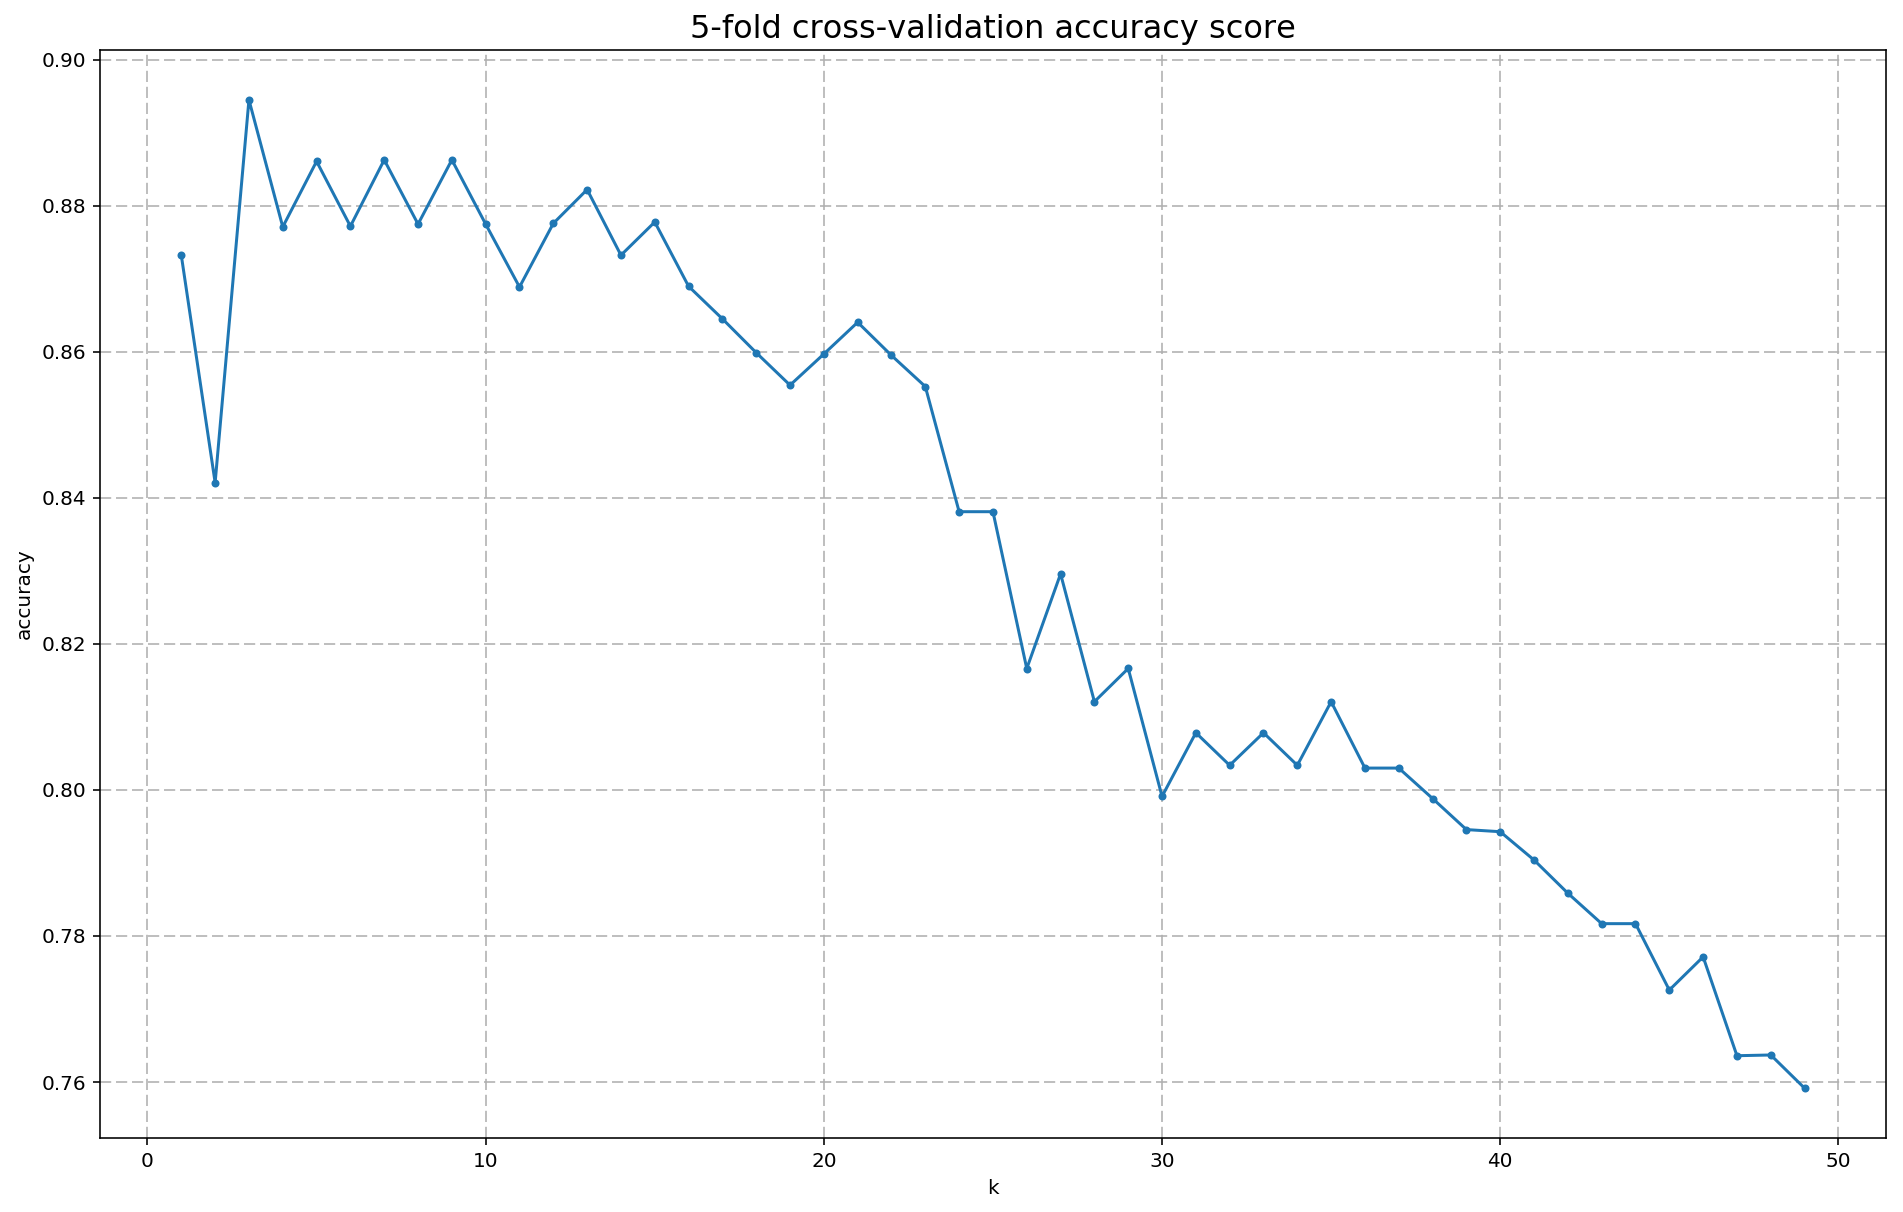

In [12]:
from sklearn.model_selection import cross_val_score

n_neighbors = range(1, 50)
cv_accuracy = [cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k), sample, cluster,
    scoring='accuracy', cv=5).mean() for k in n_neighbors]

plt.figure(figsize=(16, 10))
plt.grid(linestyle='--')
plt.plot(n_neighbors, cv_accuracy, marker='.')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('5-fold cross-validation accuracy score', fontsize=16)
plt.show()

Оптимальное значение количества соседей достигается при $k=4$.